<a href="https://colab.research.google.com/github/Frusan1/Ciencia_Dados/blob/main/SindromeRespiratoriaAgudaGrave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema

<p align="justify">
A Sindróme Respiratória Aguda Grave (SRAG) abrange casos de síndrome gripal que evoluem com compromentimento da função respiratória, que na maioria dos casos, leva à hospitalização. Pode ser causadas por vírus (Influenza A e B, SARS-COV-2), bactérias, fungos etc.

O indivío com SRAG pode apresentar, desconforto respiratório, pressão persistente no tórax ou saturação de O2 menor que 95%, cianoso dos lábios, rosto.

**Objetivo:** verificar se é possível prever a evolução do paciente através da presença/ausência de fatores de risco.
</p>


# Importando biblioteca e dados


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importanto técnicas de avaliação de modelos
from sklearn.metrics import accuracy_score as accuracy_score #métrica acurácia
from sklearn.metrics import precision_score #métrica precisão
from sklearn.metrics import classification_report #várias métricas
from sklearn.model_selection import train_test_split #técnica de partição em treino e teste

#Importando as técnicas de aprendizagem
from sklearn.neural_network import MLPClassifier #técnica rede neural
from sklearn.ensemble import RandomForestClassifier #técnica random forest
from sklearn.linear_model import LogisticRegression #técninca de regressão logístic
from sklearn.model_selection import GridSearchCV #técnica para configurar parâmetros do modelo

In [ ]:
dados =pd.read_csv("/content/drive/MyDrive/Datasets/INFLUD23-05-06-2023.csv", sep= ";", low_memory=False)

# Dicionário de dados

**Dicionário oficial dataset:** https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/pdfs/Dicionario_de_Dados_SRAG_Hospitalizado_19.09.2022.pdf


**Dicionário adaptado para o problema**:

NU_IDADE_N: Idade paciente

CS_GESTANT: Paciente é gestante? 1- Sim 0- Não

CARDIOPATI: Paciente possui Doença Cardiovascular Crônica? 1- Sim 0- Não

HEMATOLOGI: Paciente possui Doença Hematológica Crônica? 1- Sim 0- Não

HEPATICA: Paciente possui Doença Hepática Crônica? 1- Sim 0- Não

DIABETES: Paciente possui Diabetes mellitus? 1- Sim 0- Não

NEUROLOGIC: Paciente possui Doença Neurológica? 1- Sim 0- Não

PNEUMOPATI: Paciente possui outra pneumopatia crônica? 1- Sim 0- Não

IMUNODEPRE: Paciente possui Imunodeficiência? 1- Sim 0- Não

RENAL: Paciente possui Doença Renal Crônica? 1- Sim 0- Não

OBESIDADE: Paciente possui obesidade? 1- Sim 0- Não

VACINA_COV: O paciente recebeu vacina para COVID-19? 1- Sim 0- Não

CLASSI_FIN: Diagnóstico final do caso. 5- SRAG por Covid-9

EVOLUCAO: Evolução do caso: 1- Cura 0- Óbito

# Visualização e seleção de dados

In [ ]:
dados.head(10)

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,LOTE_2_COV,LOTE_REF,FNT_IN_COV,DOSE_2REF,FAB_COVRF2,LOTE_REF2,TRAT_COV,TIPO_TRAT,OUT_TRAT,DT_TRT_COV
0,05/01/2023,1,02/01/2023,1,MS,NRS JARDIM,5546.0,BELA VISTA,500210,HOSPITAL SAO VICENTE DE PAULA,...,210136,FF8842,2,30/04/2022,88 - COVID-19 JANSSEN - AD26.COV2.S,207H21A,2.0,NaN,NaN,NaN
1,04/01/2023,1,02/01/2023,1,MG,BELO HORIZONTE,1449.0,BELO HORIZONTE,310620,HOSPITAL RISOLETA TOLENTINO NEVES,...,210087,31025BD,2,08/04/2022,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,21OVCD330Z,2.0,NaN,NaN,NaN
2,10/01/2023,2,07/01/2023,1,MG,DIVINOPOLIS,1472.0,DIVINOPOLIS,312230,UPA 24 HORAS PADRE ROBERTO CORDEIRO MARTINS,...,216VCD200Z,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12/01/2023,2,07/01/2023,1,SC,FLORIANOPOLIS,1476.0,FLORIANOPOLIS,420540,HOSPITAL INFANTIL JOANA DE GUSMAO,...,NaN,NaN,2,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,10/01/2023,2,01/01/2023,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,UPA PIRITUBA,...,NaN,NaN,1,20/10/2022,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,221VCD027Z,2.0,NaN,NaN,NaN
5,05/01/2023,1,03/01/2023,1,PE,001,1497.0,RECIFE,261160,HOSPITAL BARAO DE LUCENA,...,NaN,NaN,2,NaN,NaN,NaN,2.0,NaN,NaN,NaN
6,06/01/2023,1,04/01/2023,1,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440,HIAS HOSPITAL INFANTIL ALBERT SABIN,...,NaN,NaN,1,NaN,NaN,NaN,9.0,NaN,NaN,NaN
7,06/01/2023,1,01/01/2023,1,SP,GVE XXXIII TAUBATE,1352.0,TAUBATE,355410,HOSPITAL REGIONAL DO VALE DO PARAIBA,...,215VCD166Z,NaN,2,NaN,NaN,NaN,2.0,NaN,NaN,NaN
8,17/01/2023,3,02/01/2023,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSPITAL DA CRIANCA,...,NaN,NaN,1,NaN,NaN,NaN,2.0,NaN,NaN,NaN
9,17/01/2023,3,16/01/2023,3,PI,1 GRS PARNAIBA,1868.0,PARNAIBA,220770,HOSPITAL ESTADUAL DIRCEU ARCOVERDE,...,217VCD241Z,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dados.columns.values

array(['DT_NOTIFIC', 'SEM_NOT', 'DT_SIN_PRI', 'SEM_PRI', 'SG_UF_NOT',
       'ID_REGIONA', 'CO_REGIONA', 'ID_MUNICIP', 'CO_MUN_NOT',
       'ID_UNIDADE', 'CO_UNI_NOT', 'CS_SEXO', 'DT_NASC', 'NU_IDADE_N',
       'TP_IDADE', 'COD_IDADE', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N',
       'ID_PAIS', 'CO_PAIS', 'SG_UF', 'ID_RG_RESI', 'CO_RG_RESI',
       'ID_MN_RESI', 'CO_MUN_RES', 'CS_ZONA', 'SURTO_SG', 'NOSOCOMIAL',
       'AVE_SUINO', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP',
       'SATURACAO', 'DIARREIA', 'VOMITO', 'OUTRO_SIN', 'OUTRO_DES',
       'PUERPERA', 'FATOR_RISC', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN',
       'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI',
       'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OBES_IMC', 'OUT_MORBI',
       'MORB_DESC', 'VACINA', 'DT_UT_DOSE', 'MAE_VAC', 'DT_VAC_MAE',
       'M_AMAMENTA', 'DT_DOSEUNI', 'DT_1_DOSE', 'DT_2_DOSE', 'ANTIVIRAL',
       'TP_ANTIVIR', 'OUT_ANTIV', 'DT_ANTIVIR', 'HOSPITAL', 'DT_INTERNA',
       'SG_UF_INTE

In [ ]:
#Selecionando colunas de interesse
dadosSelecionados = dados.filter(items = ['NU_IDADE_N', 'CS_GESTANT', 'CARDIOPATI', 'HEMATOLOGI', 'HEPATICA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI',
       'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'VACINA_COV', 'CLASSI_FIN', 'EVOLUCAO'])

In [ ]:
dadosSelecionados.head()

,NU_IDADE_N,CS_GESTANT,CARDIOPATI,HEMATOLOGI,HEPATICA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,VACINA_COV,CLASSI_FIN,EVOLUCAO
0,74,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,1.0
1,79,6,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,4.0,2.0
2,75,6,2.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN,NaN,1.0,5.0,1.0
3,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0
4,54,5,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,5.0,2.0


# Tratamento dos dados


In [ ]:
#Verificando os dados nulos
dadosSelecionados.isna().sum()

NU_IDADE_N        0
CS_GESTANT        0
CARDIOPATI    85734
HEMATOLOGI    92000
HEPATICA      92209
DIABETES      88235
NEUROLOGIC    90403
PNEUMOPATI    90656
IMUNODEPRE    91122
RENAL         91601
OBESIDADE     92240
VACINA_COV       48
CLASSI_FIN    18871
EVOLUCAO      31352
dtype: int64

In [ ]:
#Apagando os dados nulos
for coluna in dadosSelecionados.columns:
    dadosSelecionados = dadosSelecionados.dropna(subset=[coluna])

dadosSelecionados.isna().sum()

NU_IDADE_N    0
CS_GESTANT    0
CARDIOPATI    0
HEMATOLOGI    0
HEPATICA      0
DIABETES      0
NEUROLOGIC    0
PNEUMOPATI    0
IMUNODEPRE    0
RENAL         0
OBESIDADE     0
VACINA_COV    0
CLASSI_FIN    0
EVOLUCAO      0
dtype: int64

In [ ]:
#Verificando os tipo
dadosSelecionados.dtypes

NU_IDADE_N      int64
CS_GESTANT      int64
CARDIOPATI    float64
HEMATOLOGI    float64
HEPATICA      float64
DIABETES      float64
NEUROLOGIC    float64
PNEUMOPATI    float64
IMUNODEPRE    float64
RENAL         float64
OBESIDADE     float64
VACINA_COV    float64
CLASSI_FIN    float64
EVOLUCAO      float64
dtype: object

In [ ]:
#Alterando os dados para inteiro
colunas_inteiro = [coluna for coluna in dadosSelecionados.columns]
dadosSelecionados[colunas_inteiro] = dadosSelecionados[colunas_inteiro].astype(int)

In [ ]:
#Selecionando apenas os casos de pacientes com COVID
dadosSelecionados = dadosSelecionados[dadosSelecionados['CLASSI_FIN'] == 5]

In [ ]:
#Verificando as categorias
for coluna in dadosSelecionados.columns:
  grupos = dadosSelecionados.groupby(coluna).size()
  print(coluna)
  print(grupos)

NU_IDADE_N
NU_IDADE_N
0       3
1      53
2      46
3      48
4      41
       ..
103     2
104     6
105     1
106     2
107     1
Length: 108, dtype: int64
CS_GESTANT
CS_GESTANT
1       6
2      14
3      51
4       4
5    3100
6    4747
9     157
dtype: int64
CARDIOPATI
CARDIOPATI
1    3976
2    4041
9      62
dtype: int64
HEMATOLOGI
HEMATOLOGI
1     206
2    7771
9     102
dtype: int64
HEPATICA
HEPATICA
1     153
2    7825
9     101
dtype: int64
DIABETES
DIABETES
1    2552
2    5459
9      68
dtype: int64
NEUROLOGIC
NEUROLOGIC
1    1016
2    6974
9      89
dtype: int64
PNEUMOPATI
PNEUMOPATI
1     805
2    7184
9      90
dtype: int64
IMUNODEPRE
IMUNODEPRE
1     688
2    7296
9      95
dtype: int64
RENAL
RENAL
1     663
2    7325
9      91
dtype: int64
OBESIDADE
OBESIDADE
1     555
2    7393
9     131
dtype: int64
VACINA_COV
VACINA_COV
1    7138
2     868
9      73
dtype: int64
CLASSI_FIN
CLASSI_FIN
5    8079
dtype: int64
EVOLUCAO
EVOLUCAO
1    5500
2    2080
3     263
9     236
dtyp

In [ ]:
#Verificando se existe alguma anormalidade na idade
dadosSelecionados.loc[(dadosSelecionados['NU_IDADE_N'] > 121) | (dadosSelecionados['NU_IDADE_N'] < 0)]

,NU_IDADE_N,CS_GESTANT,CARDIOPATI,HEMATOLOGI,HEPATICA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,VACINA_COV,CLASSI_FIN,EVOLUCAO


In [ ]:
#Removendo dados não informados pra todas as colunas
for coluna in dadosSelecionados.columns:
    dadosTratados = dadosSelecionados.drop(dadosSelecionados[dadosSelecionados[coluna] == 9.0].index)
    dadosSelecionados = dadosTratados.copy()  # Reatribuir o DataFrame modificado a dadosSelecionados
    grupos = dadosTratados.groupby(coluna).size()
    print(grupos)

NU_IDADE_N
0       3
1      53
2      46
3      48
4      41
       ..
103     2
104     6
105     1
106     2
107     1
Length: 107, dtype: int64
CS_GESTANT
1       6
2      14
3      51
4       4
5    3099
6    4728
dtype: int64
CARDIOPATI
1    3899
2    3956
dtype: int64
HEMATOLOGI
1     194
2    7615
dtype: int64
HEPATICA
1     150
2    7651
dtype: int64
DIABETES
1    2484
2    5312
dtype: int64
NEUROLOGIC
1     983
2    6804
dtype: int64
PNEUMOPATI
1     776
2    7005
dtype: int64
IMUNODEPRE
1     652
2    7120
dtype: int64
RENAL
1     640
2    7124
dtype: int64
OBESIDADE
1     533
2    7190
dtype: int64
VACINA_COV
1    6825
2     831
dtype: int64
CLASSI_FIN
5    7656
dtype: int64
EVOLUCAO
1    5224
2    1978
3     240
dtype: int64


In [ ]:
#Verificando as categorias de gestante
dadosTratados.groupby('CS_GESTANT').size()

CS_GESTANT
1       6
2      14
3      50
4       4
5    2944
6    4424
dtype: int64

In [ ]:
#Transformando os dados em gestante ou não gestante
dadosTratados.loc[dadosTratados['CS_GESTANT'].isin([1, 2, 3, 4]), 'CS_GESTANT'] = 1
dadosTratados.loc[dadosTratados['CS_GESTANT'].isin([5, 6]), 'CS_GESTANT'] = 0
dadosTratados.groupby('CS_GESTANT').size()

CS_GESTANT
0    7368
1      74
dtype: int64

In [ ]:
#Excluindo os casos de óbito por outros motivos
dadosTratados = dadosTratados[dadosTratados['EVOLUCAO'] != 3]
dadosTratados.groupby('EVOLUCAO').size()

EVOLUCAO
1    5224
2    1978
dtype: int64

In [ ]:
#Padronizando os dados binários
for coluna in dadosTratados.columns:
    if coluna != 'NU_IDADE_N':
        dadosTratados.loc[dadosTratados[coluna] == 2, coluna] = 0
        print(dadosTratados.groupby(coluna).size())

CS_GESTANT
0    7129
1      73
dtype: int64
CARDIOPATI
0    3632
1    3570
dtype: int64
HEMATOLOGI
0    7029
1     173
dtype: int64
HEPATICA
0    7069
1     133
dtype: int64
DIABETES
0    4906
1    2296
dtype: int64
NEUROLOGIC
0    6291
1     911
dtype: int64
PNEUMOPATI
0    6496
1     706
dtype: int64
IMUNODEPRE
0    6618
1     584
dtype: int64
RENAL
0    6622
1     580
dtype: int64
OBESIDADE
0    6699
1     503
dtype: int64
VACINA_COV
0     767
1    6435
dtype: int64
CLASSI_FIN
5    7202
dtype: int64
EVOLUCAO
0    1978
1    5224
dtype: int64


<ipython-input-141-e6a52711faba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadosTratados.loc[dadosTratados[coluna] == 2, coluna] = 0
<ipython-input-141-e6a52711faba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadosTratados.loc[dadosTratados[coluna] == 2, coluna] = 0
<ipython-input-141-e6a52711faba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadosTratados.loc[dadosTratados[coluna] == 2, coluna] = 0
<ipython-input-141-

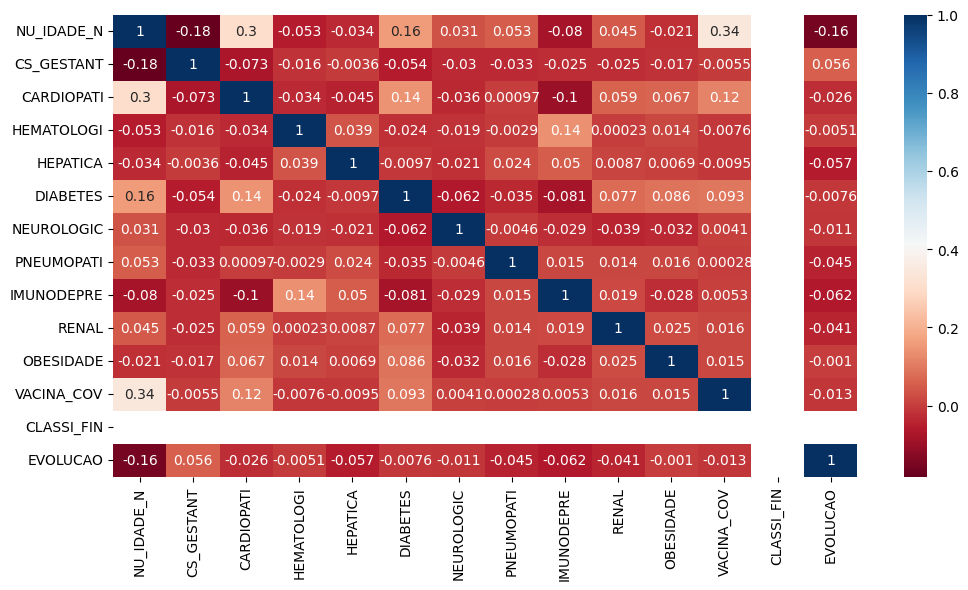

In [ ]:
#Verificando correlação entre as variáveis
correlacao = dadosTratados.corr()
correlacao
plt.rc('figure', figsize = (12,6))
ax = sns.heatmap(correlacao, cmap ='RdBu', annot = True)

# Pré-processamento

1    5224
0    1978
Name: EVOLUCAO, dtype: int64


Text(0, 0.5, 'Contagem')

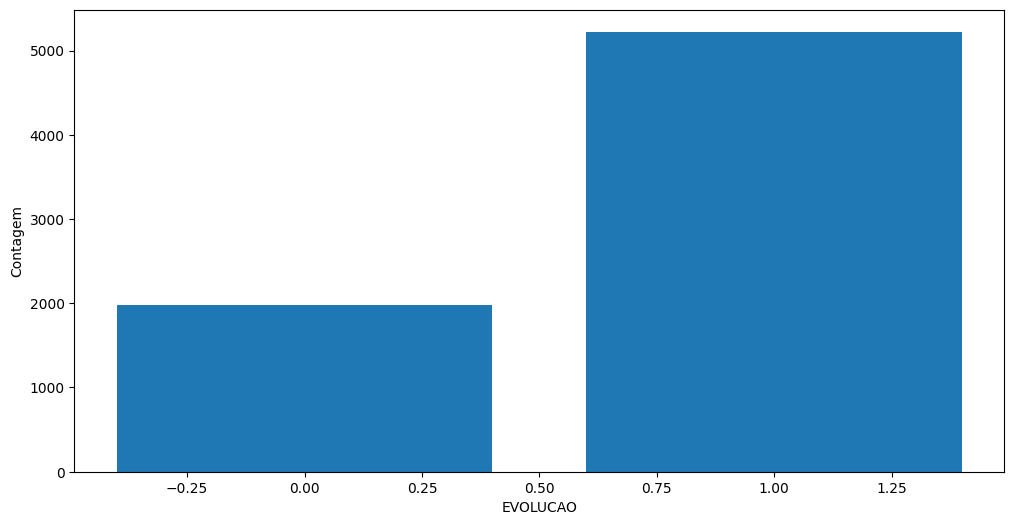

In [ ]:
#As classes estão desbalanceadas
counts = (dadosTratados['EVOLUCAO'].value_counts())
print(counts)

plt.bar(counts.index, counts.values)
plt.xlabel("EVOLUCAO")
plt.ylabel("Contagem")

In [ ]:
X = dadosTratados.drop(['EVOLUCAO', 'CLASSI_FIN'], axis =1)
y = dadosTratados.EVOLUCAO

In [ ]:
#Separando em treino e teste
X_treino, X_teste, y_treino, y_teste =   train_test_split(X, y, random_state = 42)

In [ ]:
#Resolvendo undersampling através da seleção de amostras que têm menor média de distância para os k vizinhos mais próximos da classe minoritária
from imblearn.under_sampling import NearMiss
undersampler = NearMiss(version = 1, n_neighbors = 3)
X_smote, y_smote = undersampler.fit_resample(X_treino, y_treino)

In [ ]:
X = X_smote
y = y_smote

In [ ]:
X_treino, X_teste, y_treino, y_teste =   train_test_split(X, y, random_state = 42)

Counter({0: 1455, 1: 1455})


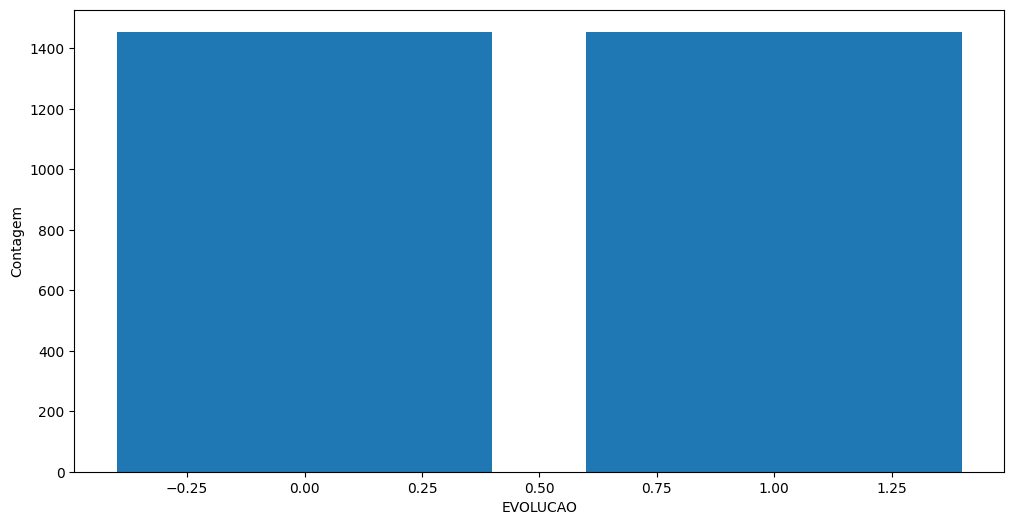

In [ ]:
#Verificando a nova distribuição
from collections import Counter

counts = Counter(y_smote)
print(counts)

plt.bar(counts.keys(), counts.values())
plt.xlabel("EVOLUCAO")
plt.ylabel("Contagem")
plt.show()


# Treinando modelos


MLPClassifier - Rede Neural

In [ ]:
modelo1 = MLPClassifier(activation = 'relu', hidden_layer_sizes=(15,10,5), learning_rate = 'constant', max_iter = 150, solver = 'adam')
modelo1.fit(X_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(15, 10, 5), max_iter=150)

In [ ]:
lr_predict_train = modelo1.predict(X_treino)
ac_lr_train = accuracy_score(y_treino, lr_predict_train)
print("Acurácia: ", ac_lr_train)

Acurácia:  0.7254812098991751


In [ ]:
lr_predict_test = modelo1.predict(X_teste)
ac_lr_test = accuracy_score(y_teste, lr_predict_test)
print("Acurácia: ", ac_lr_test)

Acurácia:  0.7321428571428571


In [ ]:
print("Classification Report")
print(classification_report(y_teste, lr_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.53      0.67       377
           1       0.65      0.95      0.77       351

    accuracy                           0.73       728
   macro avg       0.78      0.74      0.72       728
weighted avg       0.79      0.73      0.72       728



Regressão Logística

In [ ]:
modelo_2 = LogisticRegression(random_state = 5, max_iter = 1000, penalty = 'l2')
modelo_2.fit(X_treino, y_treino.ravel())

LogisticRegression(max_iter=1000, random_state=5)

In [ ]:
lr_predict_train = modelo_2.predict(X_treino)
ac_lr_train = accuracy_score(y_treino, lr_predict_train)
print("Acurácia: ", ac_lr_train)

Acurácia:  0.7222731439046746


In [ ]:
lr_predict_test = modelo_2.predict(X_teste)
ac_lr_test = accuracy_score(y_teste, lr_predict_test)
print("Acurácia: ", ac_lr_test)

Acurácia:  0.7307692307692307


In [ ]:
print("Classification Report")
print(classification_report(y_teste, lr_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.54      0.67       377
           1       0.65      0.94      0.77       351

    accuracy                           0.73       728
   macro avg       0.78      0.74      0.72       728
weighted avg       0.78      0.73      0.72       728



Random Forest - Classificação

In [ ]:
modelo_3 = RandomForestClassifier(random_state = 123)
modelo_3.fit(X_treino, y_treino)

RandomForestClassifier(random_state=123)

In [ ]:
rf_predict_train = modelo_3.predict(X_treino)
ac_rf_train = accuracy_score(y_treino, rf_predict_train)
print("Acurácia: ", ac_rf_train)

Acurácia:  0.7740604949587534


In [ ]:
rf_predict_test = modelo_3.predict(X_teste)
ac_rf_test = accuracy_score(y_teste, rf_predict_test)
print("Acurácia: ", ac_rf_test)


Acurácia:  0.7115384615384616


In [ ]:
print("Classification Report")
print(classification_report(y_teste, rf_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.56      0.67       377
           1       0.65      0.88      0.75       351

    accuracy                           0.71       728
   macro avg       0.74      0.72      0.71       728
weighted avg       0.74      0.71      0.70       728



# Testando melhor modelo

In [ ]:
variaveis = ['NU_IDADE_N', 'CS_GESTANT', 'CARDIOPATI', 'HEMATOLOGI', 'HEPATICA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI',
            'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'VACINA_COV']

In [ ]:
#Testando o pior cenário
NU_IDADE_N = int(input('Informe a idade do paciente: '))
CS_GESTANT = int(input('Informe se o paciente é gestante: '))
CARDIOPATI = int(input('Informe se o paciente tem problema cardíaco: '))
HEMATOLOGI = int(input('Informe se o paciente tem problema hematológico: '))
HEPATICA = int(input('Informe se o paciente tem problema hepático: '))
DIABETES = int(input('Informe se o paciente tem diabetes: '))
NEUROLOGIC = int(input('Informe se o paciente tem problema neurológico: '))
PNEUMOPATI = int(input('Informe se o paciente tem problema penumático:: '))
IMUNODEPRE = int(input('Informe se o paciente é imunodeprimido: '))
RENAL = int(input('Informe se o paciente tem problema renal: '))
OBESIDADE = int(input('Informe se o paciente tem obesidade: '))
VACINA_COV = int(input('Informe se o paciente tomou a vacina: '))

novo_paciente1 = [[NU_IDADE_N, CS_GESTANT, CARDIOPATI, HEMATOLOGI, HEPATICA, DIABETES, NEUROLOGIC, PNEUMOPATI,
       IMUNODEPRE, RENAL, OBESIDADE, VACINA_COV]]

Informe a idade do paciente: 30
Informe se o paciente é gestante: 1
Informe se o paciente tem problema cardíaco: 1
Informe se o paciente tem problema hematológico: 1
Informe se o paciente tem problema hepático: 1
Informe se o paciente tem diabetes: 1
Informe se o paciente tem problema neurológico: 1
Informe se o paciente tem problema penumático:: 1
Informe se o paciente é imunodeprimido: 1
Informe se o paciente tem problema renal: 1
Informe se o paciente tem obesidade: 1
Informe se o paciente tomou a vacina: 0


In [ ]:
novo_paciente1 =  pd.DataFrame(novo_paciente1, columns = variaveis)
resposta = modelo3.predict(novo_paciente1)
for i in range(len(resposta)):
  if resposta[i] == 1.0 :
    print('Muita chance de ter uma boa evolução')
  else:
    print('Pouca chance de ter uma boa evolução')

Pouca chance de ter uma boa evolução


In [ ]:
#Testando o melhor cenário
NU_IDADE_N = int(input('Informe a idade do paciente: '))
CS_GESTANT = int(input('In2forme se o paciente é gestante: '))
CARDIOPATI = int(input('Informe se o paciente tem problema cardíaco: '))
HEMATOLOGI = int(input('Informe se o paciente tem problema hematológico: '))
HEPATICA = int(input('Informe se o paciente tem problema hepático: '))
DIABETES = int(input('Informe se o paciente tem diabetes: '))
NEUROLOGIC = int(input('Informe se o paci2ente tem problema neurológico: '))
PNEUMOPATI = int(input('Informe se o paciente tem problema penumático:: '))
IMUNODEPRE = int(input('Informe se o paciente é imunodeprimido: '))
RENAL = int(input('Informe se o paciente tem problema renal: '))
OBESIDADE = int(input('Informe se o paciente tem obesidade: '))
VACINA_COV = int(input('Informe se o paciente tomou a vacina: '))

novo_paciente2 = [[NU_IDADE_N, CS_GESTANT, CARDIOPATI, HEMATOLOGI, HEPATICA, DIABETES, NEUROLOGIC, PNEUMOPATI,
       IMUNODEPRE, RENAL, OBESIDADE, VACINA_COV]]

Informe a idade do paciente: 30
In2forme se o paciente é gestante: 0
Informe se o paciente tem problema cardíaco: 0
Informe se o paciente tem problema hematológico: 0
Informe se o paciente tem problema hepático: 0
Informe se o paciente tem diabetes: 0
Informe se o paci2ente tem problema neurológico: 0
Informe se o paciente tem problema penumático:: 0
Informe se o paciente é imunodeprimido: 0
Informe se o paciente tem problema renal: 0
Informe se o paciente tem obesidade: 0
Informe se o paciente tomou a vacina: 1


In [ ]:
novo_paciente2 =  pd.DataFrame(novo_paciente2, columns = variaveis)
resposta = modelo3.predict(novo_paciente2)
for i in range(len(resposta)):
  if resposta[i] == 1.0 :
    print('Muita chance de ter uma boa evolução')
  else:
    print('Pouca chance de ter uma boa evolução')

Muita chance de ter uma boa evolução


In [ ]:
#Testando paciente com fatores de risco com menor correlação
NU_IDADE_N = int(input('Informe a idade do paciente: '))
CS_GESTANT = int(input('In2forme se o paciente é gestante: '))
CARDIOPATI = int(input('Informe se o paciente tem problema cardíaco: '))
HEMATOLOGI = int(input('Informe se o paciente tem problema hematológico: '))
HEPATICA = int(input('Informe se o paciente tem problema hepático: '))
DIABETES = int(input('Informe se o paciente tem diabetes: '))
NEUROLOGIC = int(input('Informe se o paci2ente tem problema neurológico: '))
PNEUMOPATI = int(input('Informe se o paciente tem problema penumático:: '))
IMUNODEPRE = int(input('Informe se o paciente é imunodeprimido: '))
RENAL = int(input('Informe se o paciente tem problema renal: '))
OBESIDADE = int(input('Informe se o paciente tem obesidade: '))
VACINA_COV = int(input('Informe se o paciente tomou a vacina: '))

novo_paciente3 = [[NU_IDADE_N, CS_GESTANT, CARDIOPATI, HEMATOLOGI, HEPATICA, DIABETES, NEUROLOGIC, PNEUMOPATI,
       IMUNODEPRE, RENAL, OBESIDADE, VACINA_COV]]

Informe a idade do paciente: 30
In2forme se o paciente é gestante: 0
Informe se o paciente tem problema cardíaco: 0
Informe se o paciente tem problema hematológico: 1
Informe se o paciente tem problema hepático: 0
Informe se o paciente tem diabetes: 1
Informe se o paci2ente tem problema neurológico: 0
Informe se o paciente tem problema penumático:: 0
Informe se o paciente é imunodeprimido: 0
Informe se o paciente tem problema renal: 0
Informe se o paciente tem obesidade: 1
Informe se o paciente tomou a vacina: 1


In [ ]:
novo_paciente3 =  pd.DataFrame(novo_paciente3, columns = variaveis)
resposta = modelo3.predict(novo_paciente3)
for i in range(len(resposta)):
  if resposta[i] == 1.0 :
    print('Muita chance de ter uma boa evolução')
  else:
    print('Pouca chance de ter uma boa evolução')

Pouca chance de ter uma boa evolução


# Conclusão

<p align= 'justify'>
É possível concluir que o modelo consegue prever a evolução do paciente em casos mais extremos, que envolvem muito fatores de risco, mas não é tão sensível para casos com menos fatores de risco. Também, apresenta um desempenho melhor para os casos em que existe pouca chance de ter uma boa evolução, do que o contrário.
</p>
